Check running TensorFlow version

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-alpha0'

# MNIST character predication

The MNIST database of handwritten digits, available from [this page](http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

I will build a small neural network to solve this problem

In [2]:
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

import random as rand

import numpy as np

## Load MNIST and get familiar with it

In [3]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [4]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [5]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

Plot a few random images from the dataset

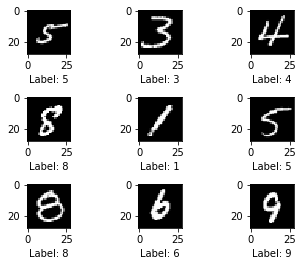

In [6]:
rows = 3
cols = 3
random_indecies = rand.sample(list(range(train_x.shape[0])), rows * cols)

plt.subplots_adjust(wspace=0, hspace=1)
for i, index in enumerate(random_indecies, 1):
    plt.subplot(rows, cols, i)
    plt.imshow(train_x[index], cmap='gray')
    plt.xlabel(f"Label: {train_y[index]}")

Check the data max, min, mean, etc... to find out how to properly scale it

In [7]:
train_x.min(), train_x.mean(), train_x.max()

(0, 33.318421449829934, 255)

In [8]:
train_x.dtype

dtype('uint8')

Scale x train and test to be between 0 and 1

In [9]:
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

## Check how balanced the data is

In [10]:
from collections import Counter

labels_counter = Counter(list(map(int, train_y)))
labels_counter = {k: v for k, v in labels_counter.items()}
labels_counter

{5: 5421,
 0: 5923,
 4: 5842,
 1: 6742,
 9: 5949,
 2: 5958,
 3: 6131,
 6: 5918,
 7: 6265,
 8: 5851}

In [11]:
bars = list(map(int, labels_counter.keys()))
bars.sort()
bars

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
counts = [labels_counter[bar] for bar in bars]
counts

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

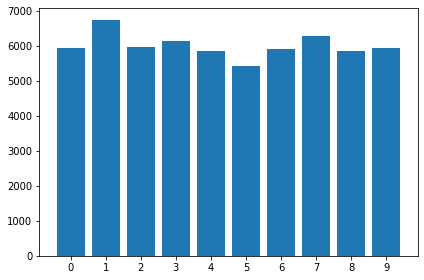

In [13]:
fig = plt.figure()

y_pos = list(range(len(bars)))
plt.bar(y_pos, counts)
plt.xticks(y_pos, bars)
fig.tight_layout()

## Encode y as one hot encoding

In [14]:
number_of_classes = len(np.unique(train_y))
number_of_classes

10

In [15]:
train_y = to_categorical(train_y, number_of_classes)
test_y = to_categorical(test_y, number_of_classes)

In [16]:
train_y.shape, train_y[0]

((60000, 10), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

## Train

In [17]:
model = Sequential()
model.add(layers.Flatten(input_shape=train_x.shape[1:]))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x=train_x, y=train_y, validation_split=0.2, shuffle=True, batch_size=128, epochs=10)
history.history.keys()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 24us/sample - loss: 0.3621 - accuracy: 0.9010 - val_loss: 0.2004 - val_accuracy: 0.9421
Epoch 2/10
48000/48000 [==============================] - 1s 19us/sample - loss: 0.1723 - accuracy: 0.9498 - val_loss: 0.1424 - val_accuracy: 0.9587
Epoch 3/10
48000/48000 [==============================] - 1s 19us/sample - loss: 0.1251 - accuracy: 0.9634 - val_loss: 0.1187 - val_accuracy: 0.9653
Epoch 4/10
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0966 - accuracy: 0.9723 - val_loss: 0.1039 - val_accuracy: 0.9690
Epoch 5/10
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0791 - accuracy: 0.9774 - val_loss: 0.1041 - val_accuracy: 0.9712
Epoch 6/10
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0662 - accuracy: 0.9808 - val_loss: 0.0971 - val_accuracy: 0.9721
Epoch 7/10
48000/48000 [==============================] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

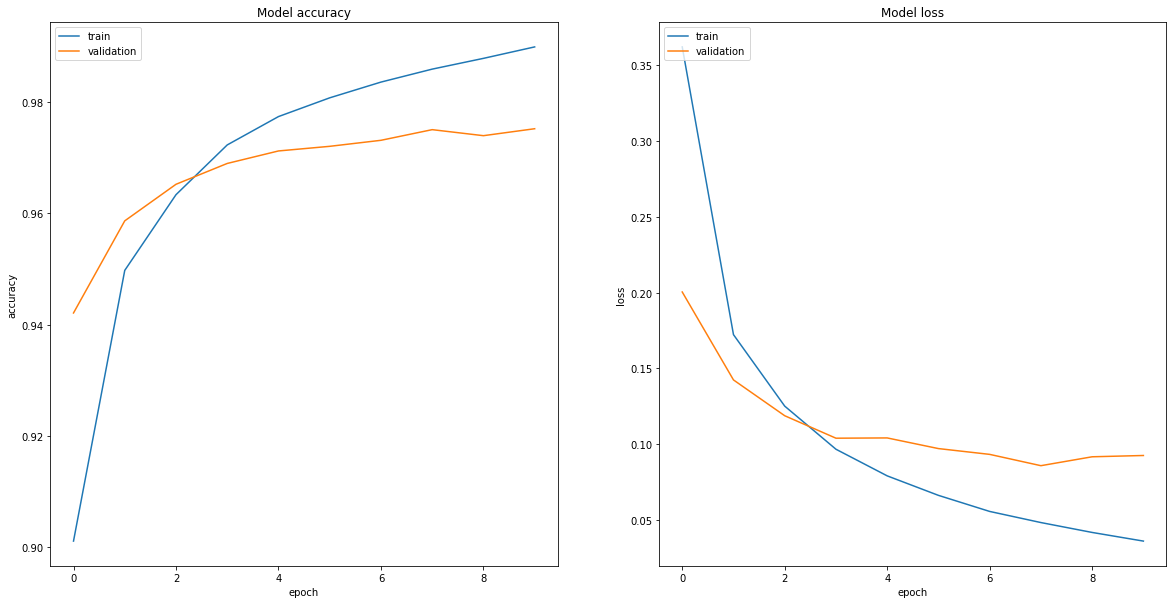

In [20]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

## Evaluate

In [21]:
loss, accuracy = model.evaluate(x=test_x, y=test_y)
loss, accuracy

10000/10000 [==============================] - 0s 21us/sample - loss: 0.0762 - accuracy: 0.9788


(0.0761661554614082, 0.9788)

## Calculate test accuracy manually

In [22]:
preds = model.predict(test_x)
preds.shape

(10000, 10)

In [23]:
correct = 0
for i, pred in enumerate(preds):
    correct += 1 if np.argmax(pred) == np.argmax(test_y[i]) else 0

correct

9788

In [24]:
correct / preds.shape[0]

0.9788

## Predict on one image

In [25]:
test_index = 1

test_image = test_x[test_index]
test_image.shape

(28, 28)

In [26]:
test_batch = test_image.reshape(1, test_image.shape[1], test_image.shape[0])
test_batch.shape

(1, 28, 28)

In [27]:
softmax = model.predict(test_batch)
softmax

array([[3.1188867e-11, 2.8539051e-05, 9.9997139e-01, 2.4600977e-09,
        9.5893249e-19, 1.6568668e-08, 1.6596176e-09, 2.8927612e-16,
        1.6182624e-09, 1.8123649e-16]], dtype=float32)

In [28]:
np.argmax(softmax)

2

In [29]:
np.argmax(test_y[test_index])

2

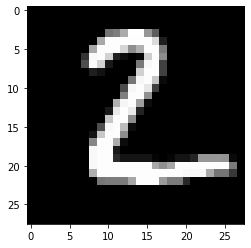

In [30]:
plt.imshow(test_image, cmap='gray')